In [5]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import metrics

data=pd.read_csv("data.csv")
data.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.1,6.5000,5.5,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9,EXCESS
1,Arunachal Pradesh,3.4,0.0003,1.0,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0,SEMICRITICAL
2,Assam,19.0,2.2000,8.6,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5,EXCESS
3,Bihar,18.9,3.9000,3.4,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9,MODERATED
4,Chhattisgarh,9.9,0.6000,0.9,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9,MODERATED


In [6]:
data

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.10,6.5000,5.50,33.80,3.100,30.80,12.600,1.5000,14.2000,2.700,15.90,EXCESS
1,Arunachal Pradesh,3.40,0.0003,1.00,4.50,0.500,4.00,0.002,0.0010,0.0030,0.010,4.00,SEMICRITICAL
2,Assam,19.00,2.2000,8.60,30.40,2.500,27.80,5.300,0.7000,6.0000,1.000,21.50,EXCESS
3,Bihar,18.90,3.9000,3.40,28.60,2.400,26.20,9.800,1.6000,11.4000,2.600,13.90,MODERATED
4,Chhattisgarh,9.90,0.6000,0.90,12.20,0.600,11.60,3.100,0.5000,3.6000,0.600,7.90,MODERATED
5,Delhi,0.10,0.1000,0.02,0.30,0.020,0.30,0.100,0.3000,0.4000,0.300,0.01,CRITICAL
6,Goa,0.10,0.0100,0.01,0.20,0.100,0.10,0.010,0.0300,0.0400,0.040,0.10,CRITICAL
7,Gujarat,12.20,2.8000,0.00,18.40,1.100,17.40,11.900,1.1000,13.0000,1.500,5.30,MODERATED
8,Haryana,3.50,2.7000,1.00,10.50,0.700,9.80,11.700,0.7000,12.4000,0.800,-2.70,CRITICAL
9,Himachal Pradesh,0.40,0.0200,0.10,0.60,0.100,0.50,0.200,0.1000,0.3000,0.100,0.20,CRITICAL


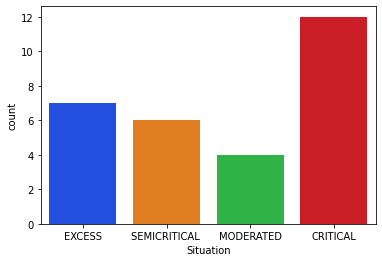

In [7]:
sb.countplot(x='Situation',data=data,palette='bright')
X = data.iloc[:, [4,5,6,9,10,11]]
Y = data.iloc[:,12]

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
from sklearn.metrics import accuracy_score
score =accuracy_score(Y_test,y_pred)

In [11]:
Availabilty = pd.get_dummies(data['Situation'],drop_first=True)
data.drop(['Situation'],axis=1,inplace=True)
data1 = pd.concat([data,Availabilty],axis=1)
X = data1.iloc[:, [4,5,6,9,10,11]]
Y = data1.iloc[:,12]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.55, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
new_score=classifier.score(X_test, Y_test)

In [14]:
Y_test


2     1
20    1
23    0
13    0
11    0
25    0
27    0
26    1
5     0
14    1
8     0
16    0
22    0
17    0
1     0
10    0
Name: EXCESS, dtype: uint8

In [15]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [16]:
classifier.score(X_test, Y_test)

0.9375

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Text(0.5, 1.0, 'Accuracy Score: 0.9375')

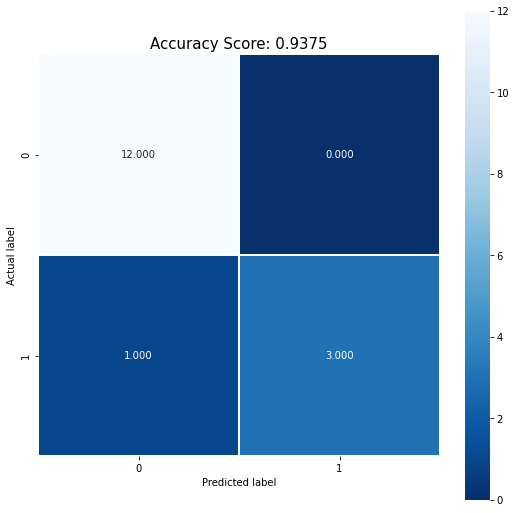

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(new_score)
plt.title(all_sample_title, size = 15)


Text(0.5, 1.0, 'Accuracy Score: 0.9375')

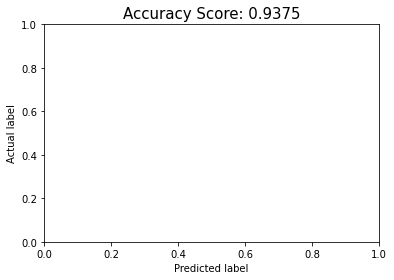